<a href="https://colab.research.google.com/github/aveerdram/KNN/blob/main/%D0%9F%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('ABBREV_with_CLASS.xlsx')

df

,Unnamed: 0,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,CLASS
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0,10
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0,10
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0,0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0,10
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,8785,83110,"MACKEREL,SALTED",43.00,305,18.50,25.10,13.40,0.00,0.0,...,7.148,8.320,6.210,95.0,80.00,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless",0.0,0
8786,8786,90240,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111,20.54,0.84,2.97,5.41,0.0,...,0.218,0.082,0.222,41.0,85.00,3 oz,NaN,NaN,0.0,0
8787,8787,90480,"SYRUP,CANE",26.00,269,0.00,0.00,0.86,73.14,0.0,...,0.000,0.000,0.000,0.0,21.00,1 serving,NaN,NaN,0.0,10
8788,8788,90560,"SNAIL,RAW",79.20,90,16.10,1.40,1.30,2.00,0.0,...,0.361,0.259,0.252,50.0,85.00,3 oz,NaN,NaN,0.0,0


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.describe()

,Unnamed: 0,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct,CLASS
count,8790.000000,8790.000000,8789.000000,8790.000000,8790.000000,8790.000000,8465.000000,8790.000000,8196.000000,6958.000000,8442.000000,8646.000000,8051.000000,8211.000000,8364.000000,8707.000000,8084.000000,7533.000000,6630.000000,7090.000000,7972.000000,8156.000000,8174.000000,8153.000000,6548.000000,7885.000000,7529.000000,6751.000000,7022.000000,6733.000000,4774.000000,7597.000000,8079.000000,7255.000000,6984.000000,5532.000000,5628.000000,5520.000000,5498.000000,5475.000000,5901.000000,5528.000000,5579.000000,5227.000000,8441.000000,8124.000000,8125.000000,8380.000000,8490.000000,4825.000000,8740.000000,8790.000000
mean,4394.500000,15663.495222,54.112218,226.317634,11.342849,10.553725,1.783468,22.127710,2.187445,8.543066,76.738214,2.699674,35.295988,165.142126,279.472740,312.495923,2.117438,0.195984,0.658156,15.591016,9.231134,0.223134,0.252237,3.657721,0.650989,0.291531,51.598220,23.169012,24.556109,64.275806,43.596230,1.392472,735.810744,111.726120,89.770046,31.496927,221.314499,10.623913,157.039651,193.970046,1.331518,0.579269,22.990142,15.631586,3.576334,4.081006,2.288767,40.613246,96.395130,250.747668,4.964416,5.715586
std,2537.598767,9251.413586,30.772854,169.877539,10.530474,15.814842,3.004609,27.270822,4.383138,14.923626,203.527453,5.687560,57.416785,204.704214,375.483729,943.431341,3.437209,0.582596,7.248609,30.471099,68.854696,0.523752,0.449461,4.823819,1.413303,0.485057,136.601781,114.513700,62.386069,207.360765,63.109904,4.566460,3848.009267,847.905482,853.251289,321.134973,1281.280007,155.313138,1397.230145,1148.404329,4.640706,3.882702,154.614465,79.949125,6.518840,7.010760,5.215654,119.869371,84.337063,382.226774,12.088471,5.076376
min,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.400000,0.000000,0.000000
25%,2197.250000,9086.250000,29.700000,91.000000,2.380000,0.950000,0.840000,0.050000,0.000000,0.000000,10.000000,0.540000,12.000000,51.000000,127.000000,41.000000,0.340000,0.052000,0.015000,1.300000,0.000000,0.040000,0.063000,0.552000,0.195000,0.051000,5.000000,0.000000,4.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.200000,0.220000,0.235750,0.220000,0.000000,29.000000,42.000000,0.000000,0.000000
50%,4394.500000,14427.500000,63.080000,191.000000,8.000000,5.140000,1.200000,9.340000,0.700000,1.840000,21.000000,1.380000,21.000000,145.000000,229.500000,88.000000,0.990000,0.090000,0.082000,10.100000,0.000000,0.084000,0.170000,2.580000,0.435000,0.150000,12.000000,0.000000,9.000000,11.000000,24.750000,0.240000,32.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,1.600000,1.592000,1.938500,0.696000,4.000000,85.000000,164.000000,0.000000,10.000000
75%,6591.750000,20142.750000,77.960000,337.000000,19.880000,13.720000,2.090000,34.910000,2.600000,9.287500,69.000000,2.600000,30.000000,220.000000,336.000000,404.500000,2.920000,0.160000,0.326000,24.300000

In [ ]:
df.describe(include='object')

,Shrt_Desc,GmWt_Desc1,GmWt_Desc2
count,8790,8491,4825
unique,8787,911,921
top,"BEEF,CHUCK,UNDER BLADE CNTR STEAK,BNLESS,DENVE...",3 oz,1 cup
freq,2,1409,298


Изучите полученный набор данных: все ли столбцы информативны, есть ли зависимости и т. д.

*К удалению рассмотрены: Unnamed: 0,	NDB_No, GmWt_1, GmWt_Desc1, GmWt_2, GmWt_Desc2, Refuse_Pct.*

In [ ]:
sns.set()
sns.set_style('darkgrid')

<ipython-input-8-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

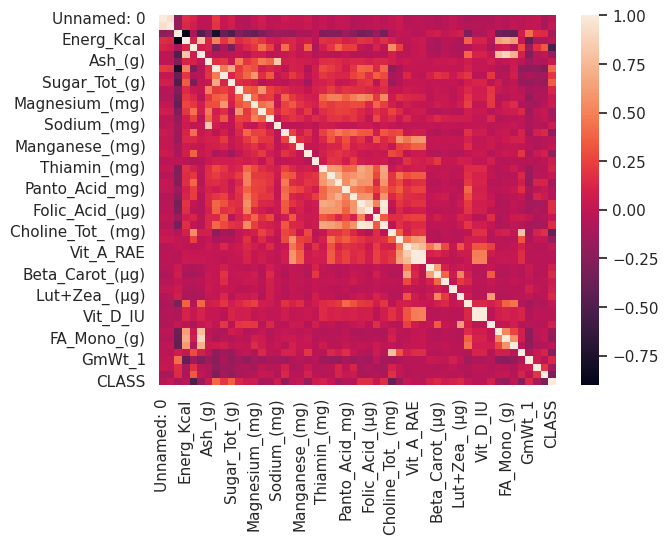

In [ ]:
sns.heatmap(df.corr())

Преобразуйте набор данных, подготовив его к применению классификации методом k-ближайших соседей:

*  выполните минимальные необходимые манипуляции (обработайте категориальные признаки и пропуски)
*  отделите столбец с меткой CLASS
*  разбейте данные на тренировочный и тестовый наборы.

In [ ]:
df = df.drop(['Unnamed: 0', 'NDB_No', 'Shrt_Desc', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2', 'GmWt_Desc2', 'Refuse_Pct'], axis=1)

In [ ]:
df.isnull().sum() # пропуски

Water_(g)               1
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)               325
Carbohydrt_(g)          0
Fiber_TD_(g)          594
Sugar_Tot_(g)        1832
Calcium_(mg)          348
Iron_(mg)             144
Magnesium_(mg)        739
Phosphorus_(mg)       579
Potassium_(mg)        426
Sodium_(mg)            83
Zinc_(mg)             706
Copper_mg)           1257
Manganese_(mg)       2160
Selenium_(µg)        1700
Vit_C_(mg)            818
Thiamin_(mg)          634
Riboflavin_(mg)       616
Niacin_(mg)           637
Panto_Acid_mg)       2242
Vit_B6_(mg)           905
Folate_Tot_(µg)      1261
Folic_Acid_(µg)      2039
Food_Folate_(µg)     1768
Folate_DFE_(µg)      2057
Choline_Tot_ (mg)    4016
Vit_B12_(µg)         1193
Vit_A_IU              711
Vit_A_RAE            1535
Retinol_(µg)         1806
Alpha_Carot_(µg)     3258
Beta_Carot_(µg)      3162
Beta_Crypt_(µg)      3270
Lycopene_(µg)        3292
Lut+Zea_ (µg)        3315
Vit_E_(mg)  

In [ ]:
df.duplicated().all()

False

*Разделим выборку, заполним пропуски с помощью среднего значения*

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('CLASS', axis=1)
y = df.CLASS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train[X_train.columns] = imputer.fit_transform(X_train)
X_test[X_test.columns] = imputer.fit_transform(X_test)

In [ ]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# df[df.columns] = imputer.fit_transform(df)

# X_train[X_train.columns] = imputer.fit_transform(X_train)
# X_test[X_test.columns] = imputer.fit_transform(X_test)

*Нормализация*

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

Обучите классификатор KNeighborsClassifier на тренировочном наборе.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

Используйте обученную модель на тестовых данных, оцените полученные результаты. Используйте визуализацию и несколько метрик.

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9385665529010239, 0.9055745164960182)

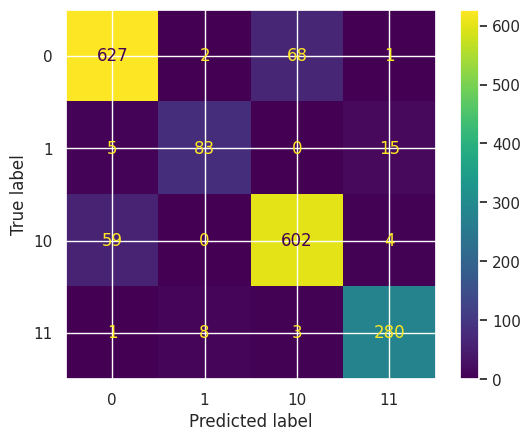

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clf.classes_)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       698
           1       0.89      0.81      0.85       103
          10       0.89      0.91      0.90       665
          11       0.93      0.96      0.95       292

    accuracy                           0.91      1758
   macro avg       0.91      0.89      0.90      1758
weighted avg       0.91      0.91      0.91      1758



Нормализуйте данные двумя способами (например, примените StandardScaler и MinMaxScaler).

Обучите ещё две модели на нормализованных данных. Оцените и сравните полученные результаты между собой и с результатами без нормализации.

StandartScaler

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('CLASS', axis=1)
y = df.CLASS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train[X_train.columns] = imputer.fit_transform(X_train)
X_test[X_test.columns] = imputer.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9310295790671217, 0.8907849829351536)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       679
           1       0.78      0.77      0.77       112
          10       0.89      0.90      0.89       673
          11       0.87      0.91      0.89       294

    accuracy                           0.89      1758
   macro avg       0.87      0.87      0.87      1758
weighted avg       0.89      0.89      0.89      1758



Normalize

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('CLASS', axis=1)
y = df.CLASS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train[X_train.columns] = imputer.fit_transform(X_train)
X_test[X_test.columns] = imputer.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import normalize

normalize(X_train, norm="l1")
normalize(X_test, norm="l1")

array([[1.98917405e-02, 1.03537450e-01, 3.00415481e-03, ...,
        2.05506152e-03, 7.09859035e-04, 3.37281089e-02],
       [1.94492931e-02, 4.72023459e-02, 7.70650545e-04, ...,
        1.60552197e-05, 2.02295768e-05, 0.00000000e+00],
       [2.00302637e-01, 7.82517083e-02, 5.47761958e-03, ...,
        1.26506928e-03, 4.62989274e-04, 6.52097569e-03],
       ...,
       [1.73434392e-02, 1.50904924e-02, 5.05850310e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.08351279e-02, 9.56980435e-02, 1.19652274e-02, ...,
        2.11605612e-03, 1.60487402e-04, 3.50694694e-02],
       [1.65969425e-02, 8.75666906e-02, 4.95193029e-03, ...,
        1.56398182e-03, 1.46962702e-04, 1.59520715e-02]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.8986063708759955, 0.8680318543799772)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       698
           1       0.74      0.67      0.71       104
          10       0.87      0.88      0.87       679
          11       0.82      0.86      0.84       277

    accuracy                           0.87      1758
   macro avg       0.84      0.83      0.83      1758
weighted avg       0.87      0.87      0.87      1758



Без нормализации

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('CLASS', axis=1)
y = df.CLASS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train[X_train.columns] = imputer.fit_transform(X_train)
X_test[X_test.columns] = imputer.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9003128555176336, 0.8549488054607508)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       686
           1       0.77      0.70      0.73       115
          10       0.86      0.86      0.86       680
          11       0.79      0.88      0.83       277

    accuracy                           0.85      1758
   macro avg       0.83      0.83      0.83      1758
weighted avg       0.86      0.85      0.85      1758



Подберите значения гиперпараметров (количество соседей и метрику расстояния) с помощью GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [3, 5, 7, 11],
          'metric': ['cityblock', 'euclidean', 'l1', 'l2', 'manhattan', 'nan_euclidean']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), params, cv = 5)

In [ ]:
clf_gs = gs.fit(X_train, y_train)

In [ ]:
clf_gs.score(X_test, y_test)

0.8845278725824801

In [ ]:
y_pred = clf_gs.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       686
           1       0.81      0.74      0.77       115
          10       0.89      0.88      0.89       680
          11       0.81      0.93      0.87       277

    accuracy                           0.88      1758
   macro avg       0.86      0.86      0.86      1758
weighted avg       0.89      0.88      0.88      1758



Сделайте выводы об использовании (плюсах и минусах) метода k-ближайших соседей для классификации в целом и применительно к рассмотренному набору данных.

Плюсы:

+ Простота
+ Не требует предположений о данных
+ Хорошо справляется с нелинейными зависимостями

Минусы:

- Вычислительная сложность
- Недостаточная эффективность на больших наборах данных
- Неэффективность при большом количестве признаков


Проведите предварительный отбор признаков и оцените результаты предсказаний, если:

- оставить только по одному из сильно коррелирующих признаков
- объединить группу связанных по смыслу признаков в один (например, для витамина A)
- повторно выбирать случайным образом поднабор из нескольких признаков и запоминать лучшие результаты (например, выбирать по 5 или по 7 признаков с помощью random.sample, повторять выбор 100 раз)
- использовать методы уменьшения размерности (например, PCA)
- свой вариант отбора и подготовки признаков.

- оставить только по одному из сильно коррелирующих признаков

<Axes: >

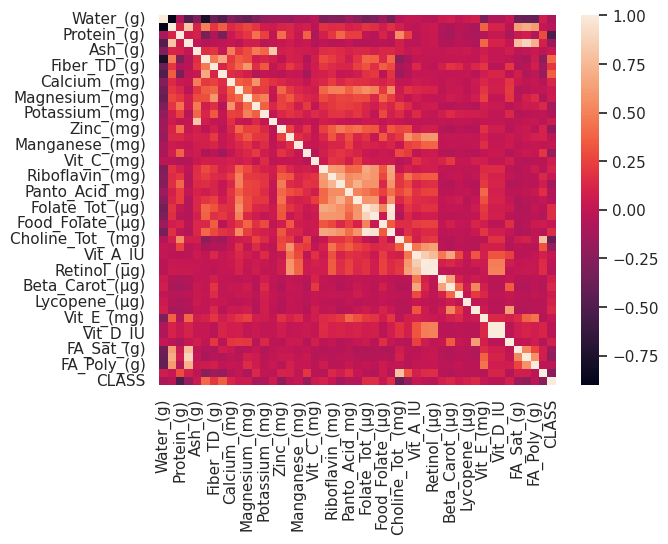

In [ ]:
sns.heatmap(df.corr())

In [ ]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[au_corr.values >= 0.9]

In [ ]:
s = get_top_abs_correlations(df)
s

Vit_D_µg         Vit_D_IU           0.999987
Vit_A_RAE        Retinol_(µg)       0.989172
Folate_Tot_(µg)  Folate_DFE_(µg)    0.982891
Folic_Acid_(µg)  Folate_DFE_(µg)    0.952292
Water_(g)        Energ_Kcal         0.900554
dtype: float64

In [ ]:
s = s.index.to_list()
s = [x[0] for x in s]

s

['Vit_D_µg', 'Vit_A_RAE', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Water_(g)']

In [ ]:
df1 = df.copy()

df1 = df1.drop(s, axis=1)

df1

,Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),CLASS
0,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,3.0,18.8,0.17,2499.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,0.0,7.0,51.368,21.021,3.043,215.0,10
1,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4.0,4.0,18.8,0.07,2468.0,671.0,1.0,135.0,6.0,0.0,13.0,1.37,0.0,4.6,45.390,19.874,3.331,225.0,10
2,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,22.3,0.01,3069.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,0.0,8.6,61.924,28.732,3.694,256.0,0
3,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36.0,36.0,15.4,1.22,721.0,192.0,0.0,74.0,0.0,0.0,0.0,0.25,21.0,2.4,18.669,7.778,0.800,75.0,10
4,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20.0,20.0,15.4,1.26,1080.0,286.0,0.0,76.0,0.0,0.0,0.0,0.26,22.0,2.5,18.764,8.598,0.784,94.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,305,18.50,25.10,13.40,0.00,0.0,0.00,66.0,1.40,60.0,254.0,520.0,4450.0,1.10,0.100,NaN,73.4,0.0,0.020,0.190,3.300,NaN,0.410,15.0,15.0,101.6,12.00,157.0,47.0,0.0,0.0,0.0,0.0,0.0,2.38,1006.0,7.8,7.148,8.320,6.210,95.0,0
8786,111,20.54,0.84,2.97,5.41,0.0,0.00,10.0,0.58,37.0,426.0,314.0,667.0,1.55,0.033,0.029,21.7,0.0,0.012,0.024,1.076,0.366,0.112,20.0,20.0,110.7,2.15,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,2.0,0.0,0.218,0.082,0.222,41.0,0
8787,269,0.00,0.00,0.86,73.14,0.0,73.20,13.0,3.60,10.0,8.0,63.0,58.0,0.19,0.020,NaN,0.7,0.0,0.130,0.060,0.100,NaN,0.000,0.0,0.0,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.000,0.000,0.0,10
8788,90,16.10,1.40,1.30,2.00,0.0,0.00,10.0,3.50,250.0,272.0,382.0,70.0,1.00,0.400,NaN,27.4,0.0,0.010,0.120,1.400,NaN,0.130,6.0,6.0,65.0,0.50,100.0,30.0,0.0,0.0,0.0,0.0,0.0,5.00,0.0,0.1,0.361,0.259,0.252,50.0,0


In [ ]:
from sklearn.model_selection import train_test_split # разделение

X = df1.drop('CLASS', axis=1)
y = df1.CLASS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.impute import SimpleImputer # заполнение пропусков

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train[X_train.columns] = imputer.fit_transform(X_train)
X_test[X_test.columns] = imputer.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler # нормализация

scaler = MinMaxScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(7)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9283276450511946, 0.9129692832764505)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       663
           1       0.92      0.78      0.84       122
          10       0.92      0.91      0.91       664
          11       0.90      0.98      0.93       309

    accuracy                           0.91      1758
   macro avg       0.91      0.89      0.90      1758
weighted avg       0.91      0.91      0.91      1758



- объединить группу связанных по смыслу признаков в один (например, для витамина A)

In [ ]:
df2 = df.copy()

len(df2.columns)

47

In [ ]:
folate = ['Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)', 'Folate_DFE_(µg)']
vitA = ['Vit_A_IU', 'Vit_A_RAE']
carot = ['Alpha_Carot_(µg)', 'Beta_Carot_(µg)']
vitD = ['Vit_D_µg', 'Vit_D_IU']
fat = ['FA_Sat_(g)', 'FA_Mono_(g)', 'FA_Poly_(g)']

all = folate + vitA + carot + vitD + fat

In [ ]:
from sklearn.model_selection import train_test_split # разделение

X = df2.drop('CLASS', axis=1)
y = df2.CLASS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.impute import SimpleImputer # заполнение пропусков

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train[X_train.columns] = imputer.fit_transform(X_train)
X_test[X_test.columns] = imputer.fit_transform(X_test)

In [ ]:
Folate = pd.Series(X_train.loc[:, folate].mean(axis=1), name='Folate')
VitA = pd.Series(X_train.loc[:, vitA].mean(axis=1), name='Vitamin_A')
Carot = pd.Series(X_train.loc[:, carot].mean(axis=1), name='Carot')
VitD =  pd.Series(X_train.loc[:, vitD].mean(axis=1), name='Vitamin_D')
Fat =  pd.Series(X_train.loc[:, fat].mean(axis=1), name='Fats')

ALL = pd.concat((Folate, VitA, Carot, VitD, Fat), axis=1)

X_train = X_train.drop(all, axis=1)
X_train = X_train.join(ALL)

In [ ]:
len(X_train.columns)

38

In [ ]:
Folate = pd.Series(X_test.loc[:, folate].mean(axis=1), name='Folate')
VitA = pd.Series(X_test.loc[:, vitA].mean(axis=1), name='Vitamin_A')
Carot = pd.Series(X_test.loc[:, carot].mean(axis=1), name='Carot')
VitD =  pd.Series(X_test.loc[:, vitD].mean(axis=1), name='Vitamin_D')
Fat =  pd.Series(X_test.loc[:, fat].mean(axis=1), name='Fats')

ALL = pd.concat((Folate, VitA, Carot, VitD, Fat), axis=1)

X_test = X_test.drop(all, axis=1)
X_test = X_test.join(ALL)

In [ ]:
len(X_test.columns)

38

In [ ]:
from sklearn.preprocessing import MinMaxScaler # нормализация

scaler = MinMaxScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(7)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.92442710872745, 0.8987485779294653)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1003
           1       0.88      0.80      0.83       152
          10       0.89      0.89      0.89      1030
          11       0.92      0.96      0.94       452

    accuracy                           0.90      2637
   macro avg       0.90      0.89      0.89      2637
weighted avg       0.90      0.90      0.90      2637



- повторно выбирать случайным образом поднабор из нескольких признаков и запоминать лучшие результаты (например, выбирать по 5 или по 7 признаков с помощью random.sample, повторять выбор 100 раз)

In [ ]:
df3 = df.copy()

In [ ]:
import random

pook = random.sample(df3.columns.to_list()[:-1], 5)

print(pook)

['Manganese_(mg)', 'Ash_(g)', 'Water_(g)', 'Vit_E_(mg)', 'Beta_Carot_(µg)']


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
scores = {}

for _ in range(100):
    features = random.sample(df3.columns.to_list()[:-1], 5)
    data = df3.loc[:, features].merge(df3.CLASS, right_index=True, left_index=True)

    X_train, X_test, y_train, y_test = train_test_split(data.drop('CLASS', axis=1), data.CLASS, test_size=0.3) # разбиение

    imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # заполнение пропусков

    X_train[X_train.columns] = imputer.fit_transform(X_train)
    X_test[X_test.columns] = imputer.fit_transform(X_test)

    scaler = MinMaxScaler()     # нормализация

    X_train[X_train.columns] = scaler.fit_transform(X_train)
    X_test[X_test.columns] = scaler.transform(X_test)

    clf = KNeighborsClassifier(7).fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    val = accuracy_score(y_test, y_pred)

    scores.update({tuple(features): val})

In [ ]:
best_scores = np.array(sorted((scores.values()))[-5:])
max(best_scores)

0.9093667045885476

In [ ]:
def get_key(d, value):
    for k, v in d.items():
        if v == value:
            return k

In [ ]:
a = get_key(scores, max(best_scores))
print(f'Best features: {a}, best score: {scores[a]}')

Best features: ('Folate_Tot_(µg)', 'Manganese_(mg)', 'Sugar_Tot_(g)', 'Ash_(g)', 'Energ_Kcal'), best score: 0.9093667045885476


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1018
           1       0.55      0.54      0.54       182
          10       0.77      0.76      0.76       997
          11       0.73      0.79      0.76       440

    accuracy                           0.77      2637
   macro avg       0.72      0.72      0.72      2637
weighted avg       0.77      0.77      0.77      2637



- использовать методы уменьшения размерности (например, PCA)

In [ ]:
df4 = df.copy()

In [ ]:
from sklearn.model_selection import train_test_split # разделение

X = df4.drop('CLASS', axis=1)
y = df4.CLASS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.impute import SimpleImputer # заполнение пропусков

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train[X_train.columns] = imputer.fit_transform(X_train)
X_test[X_test.columns] = imputer.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler # нормализация

scaler = MinMaxScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_train = pca.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

pca = PCA(n_components=10)
X_test = pca.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [ ]:
X_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.190208,0.170604,0.173122,0.054037,-0.044617,0.017448,-0.015944,0.001947,0.013508,-0.019579
1,-0.119440,0.004400,0.115430,-0.035700,0.035841,0.016954,-0.060450,-0.026353,0.024623,0.018008
2,0.729141,1.160365,-0.429712,-0.126182,0.062166,0.016127,-0.030294,-0.089896,0.037258,-0.005273
3,-0.400246,-0.154198,-0.125875,-0.004817,0.008181,-0.003089,-0.006831,-0.004131,-0.009456,-0.003644
4,-0.285209,0.086224,0.203992,0.072264,-0.080034,0.024746,0.014468,-0.020175,0.025281,-0.008463
...,...,...,...,...,...,...,...,...,...,...
6148,-0.399948,-0.081925,-0.121837,0.009467,0.018182,-0.011320,-0.006121,-0.001421,-0.010709,0.018965
6149,0.610531,-0.102118,0.039170,-0.109337,-0.049058,0.052818,-0.008081,0.010800,0.016306,0.031847
6150,-0.470268,-0.114622,-0.132738,-0.002308,0.053381,-0.016826,-0.023151,-0.006175,-0.018230,-0.007338
6151,0.735797,-0.048632,-0.235846,0.274897,0.050934,-0.093878,0.014408,-0.101509,-0.000638,-0.046690


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(7)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9250771981147408, 0.8680318543799772)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1019
           1       0.86      0.73      0.79       173
          10       0.89      0.83      0.86      1008
          11       0.87      0.96      0.91       437

    accuracy                           0.87      2637
   macro avg       0.87      0.85      0.86      2637
weighted avg       0.87      0.87      0.87      2637



- свой вариант отбора и подготовки признаков

Заполним пропуски с помощью KNN, оставим только наиболее популярные нутриенты и подберём параметры с помощью GridSearchCV

In [ ]:
df5 = df.copy()

In [ ]:
df5.columns

Index(['Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Ash_(g)',
       'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)', 'Calcium_(mg)',
       'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)',
       'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)',
       'Selenium_(µg)', 'Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)',
       'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)', 'Folate_Tot_(µg)',
       'Folic_Acid_(µg)', 'Food_Folate_(µg)', 'Folate_DFE_(µg)',
       'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU', 'Vit_A_RAE',
       'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'CLASS'],
      dtype='object')

In [ ]:
df5 = df5.drop(['Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)', 'Folate_Tot_(µg)',
                'Food_Folate_(µg)', 'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_A_RAE', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
                'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_D_µg', 'FA_Sat_(g)', 'FA_Mono_(g)', 'Cholestrl_(mg)'], axis=1)

In [ ]:
len(df5.columns)

27

In [ ]:
from sklearn.model_selection import train_test_split # разделение

X = df5.drop('CLASS', axis=1)
y = df5.CLASS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.impute import KNNImputer # заполнение пропусков

imputer = KNNImputer(n_neighbors=5)

X_train[X_train.columns] = imputer.fit_transform(X_train)
X_test[X_test.columns] = imputer.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler # нормализация

scaler = MinMaxScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [5, 7, 9, 11],
          'metric': ['cityblock', 'euclidean', 'l1', 'l2', 'manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), params, n_jobs=5, cv = 5)

In [ ]:
clf_gs = gs.fit(X_train, y_train)

In [ ]:
clf_gs.score(X_test, y_test)

0.8433826317785362

In [ ]:
y_pred = clf_gs.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       996
           1       0.69      0.46      0.55       171
          10       0.84      0.89      0.86      1017
          11       0.83      0.93      0.88       453

    accuracy                           0.84      2637
   macro avg       0.81      0.78      0.78      2637
weighted avg       0.84      0.84      0.84      2637



Оценим f1 меру.

1. оставить только по одному из сильно коррелирующих признаков -- [0.91, 0.84, 0.91, 0.93]

2. объединить группу связанных по смыслу признаков в один -- [0.89, 0.83, 0.89, 0.94]

3. повторно выбирать случайным образом поднабор из 5 признаков и запоминать лучшие результаты -- [0.81, 0.54, 0.76, 0.76]

4. использовать метод уменьшения размерности PCA -- [0.87, 0.79, 0.86, 0.91]

5. заполнить пропуски с помощью KNN, оставить наиболее популярные нутриенты, использовать GridSearchCV - [0.85, 0.55, 0.86, 0.88]

От худшего результата к лучшему:

3

5

4

2

1

Таким образом, лучший результат у оставления одного из сильно коррелирующих признаков. (Что говорит о том как сильно влияет корреляция между признаками в KNN)